In [19]:
!pip3 install tsfel

  Using cached https://files.pythonhosted.org/packages/3f/b8/15ebfda7ca2addef96b909495558efb4e718c3200ac298dfc4c143f46e2d/tsfel-0.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0d/7b/c17815648dc31396af865b9c6627cc3f95705954e30f61106795361c39ee/statsmodels-0.12.2-cp36-cp36m-manylinux1_x86_64.whl
  Could not find a version that satisfies the requirement pandas>=1.5.3 (from tsfel) (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5)
No matching distribution found for pandas>=1.5.3

In [21]:
import librosa
import librosa.display
import obspy
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import tsfel
import pandas as pd
import csv


from matplotlib.ticker import FuncFormatter

In [22]:
directory = "./data/wav"

# get list of filenames in the directory
filenames = os.listdir(directory)

# create list of paths of wav files
wav_files_paths = []
for filename in filenames:
    if filename[-4:] == ".wav":
        # print(filename)
        wav_files_paths.append("./data/wav/" + filename)

In [23]:
# Creating csv files with paths of all the wav files
with open('wav_files_paths.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write each element in the list to a new row
    for item in wav_files_paths:
        writer.writerow([item])

In [24]:
# create np array 
full_audio_data = np.array([])
full_audio_data_list = []
for path in wav_files_paths:
    y, sr = librosa.load(path) # data, sampling rate
    full_audio_data_list.append(y)

full_audio_data = np.concatenate(full_audio_data_list)

./data/wav/OS_7_05_2019_08_24_00_.wav


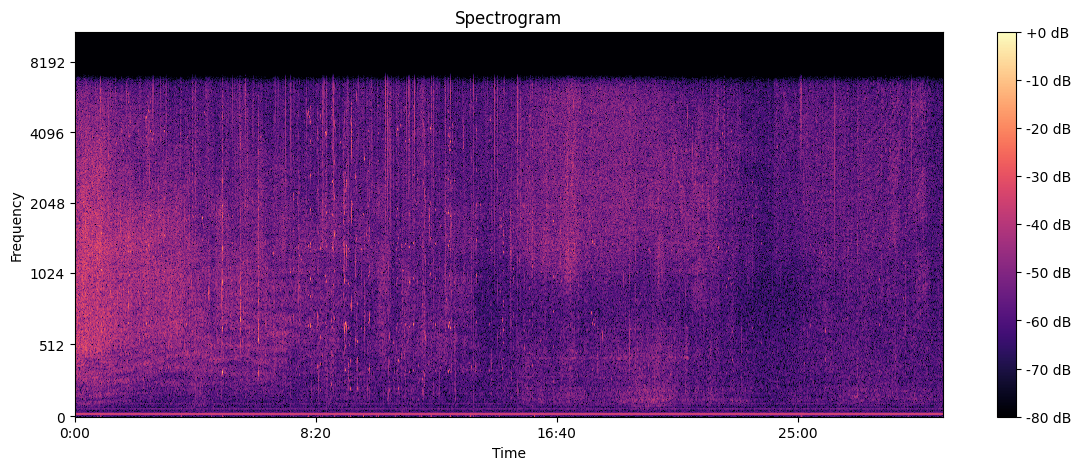

In [25]:
# Plotting spectrogram for whole audio file (30 mins)
# Load the first audio file
y, sr = librosa.load(wav_files_paths[0])
print(wav_files_paths[0])

# Parameters for STFT
n_fft = 2048  # Number of FFT components
win_length = 1024  # Window size
hop_length = 512  # Number of samples between successive frames

# Compute the STFT of the audio signal
stft_result = librosa.stft(y, n_fft=n_fft, win_length=win_length, hop_length=hop_length)

# Compute the magnitudes of the STFT result
magnitude = np.abs(stft_result)

# Convert the magnitudes to decibel (dB) scale
db_scale = librosa.amplitude_to_db(magnitude, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(db_scale, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

./data/wav/OS_7_05_2019_08_24_00_.wav


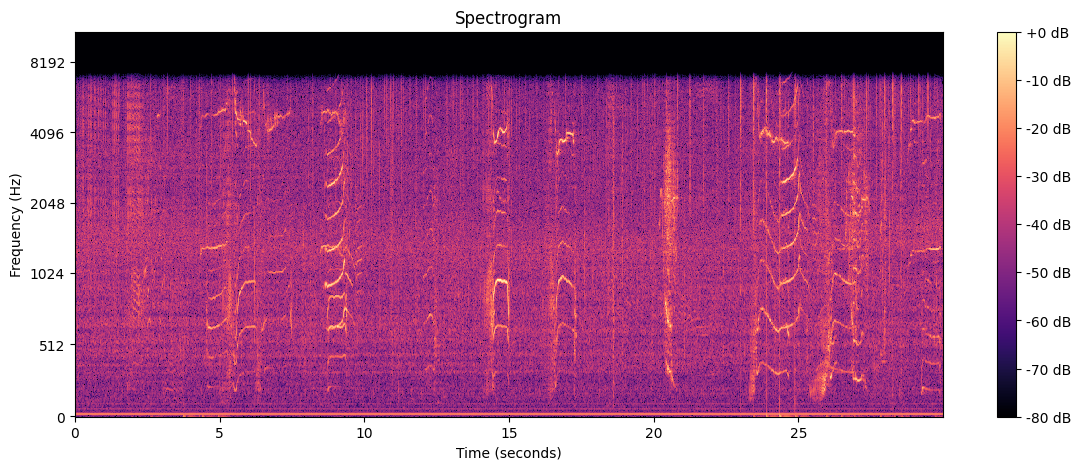

In [28]:
# Plotting spectrogram of audio from 8:00-8:30 mins.
# Load the first audio file
y, sr = librosa.load(wav_files_paths[0])
print(wav_files_paths[0])

# Define the start and end times for the snippet (in seconds)
start_time = 480  # e.g., 1 minute mark
end_time = start_time + 30  # 1 minute later

# Convert start and end times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Extract the snippet from the audio signal
snippet = y[start_sample:end_sample]

# Parameters for STFT
n_fft = 2048  # Number of FFT components
win_length = 1024  # Window size
hop_length = 512  # Number of samples between successive frames

# Compute the STFT of the snippet
stft_result = librosa.stft(snippet, n_fft=n_fft, win_length=win_length, hop_length=hop_length)

# Compute the magnitudes of the STFT result
magnitude = np.abs(stft_result)

# Convert the magnitudes to decibel (dB) scale
db_scale = librosa.amplitude_to_db(magnitude, ref=np.max)

# Plot the spectrogram for the snippet
plt.figure(figsize=(14, 5))
librosa.display.specshow(db_scale, sr=sr, x_axis='time', y_axis='mel', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [29]:
# export np array into h5 file
filename = "./data/audio_data.h5"
with h5py.File(filename, 'w') as f:
    f.create_dataset('orca_audio_data', data=full_audio_data)

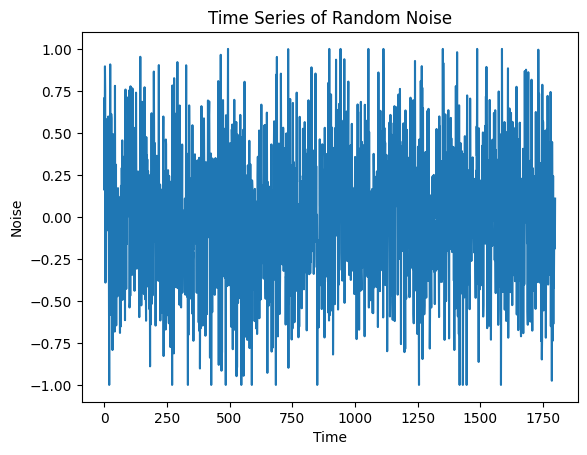

In [42]:
# Creating 30 min-long noise

# Set the random seed for reproducibility
np.random.seed(0)

# Number of data points
num_points = 1800 # 30 mins

# Generate random noise
noise = np.random.normal(loc=0, scale=0.4, size=num_points)

# Clip the noise to be between -1 and 1
noise = np.clip(noise, -1, 1)

# Create a time axis
time = np.arange(num_points)

# Plot the noise as a time series
plt.plot(time, noise)
plt.xlabel('Time')
plt.ylabel('Noise')
plt.title('Time Series of Random Noise')
plt.show()

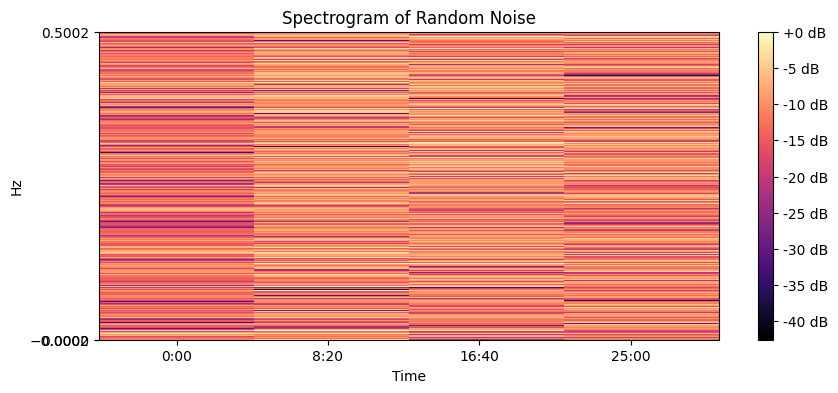

In [41]:
# # Plotting mel spectogram for noise
# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(noise)

# Compute the magnitude of the STFT
magnitude = np.abs(stft)

# Convert the magnitude to decibel scale
db_scale = librosa.amplitude_to_db(magnitude, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(db_scale, sr=1, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Random Noise')
plt.show()